# Logistic Regression Baseline Model (Ness Mayker, Curiosity Team)

#### This notebook recreates the baseline logistic regression model used in the Heroku Application to predict heart disease 

(by Kamil Pytlak https://github.com/kamilpytlak/heart-condition-checker) 

#### Using the Personal Key Indicators of Heart Disease dataset on Kaggle.com 
https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

This notebook uses code provided by: 

The Erdös Institute May 2022 Bootcamp
https://github.com/TheErdosInstitute/code-2022
and

"Introduction to ML - Binary Logistic Regression Example for Beginners" 
https://github.com/pitsillides91/Python-Tutorials

In [1]:
# import packages
import pandas as pd 
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from math import sqrt

%matplotlib inline

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})

In [2]:
# Load in data
hd       = pd.read_csv("../Data/heart_2020_cleaned.csv")
hd_train = pd.read_csv("../Data/data_train.csv")
hd_test  = pd.read_csv("../Data/data_test.csv")

# Print shape of data
print(hd.shape)

(319795, 18)


In [3]:
hd.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
hd.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [5]:
# Features used in Heroku app
features = ["BMI", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking",
            "Sex", "AgeCategory", "Race", "Diabetic", "PhysicalActivity",
            "GenHealth", "Asthma", "KidneyDisease", "SkinCancer"]

hd_train_keep_X = hd_train[["BMI", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking",
            "Sex", "AgeCategory", "Race", "Diabetic", "PhysicalActivity",
            "GenHealth", "Asthma", "KidneyDisease", "SkinCancer"]]
hd_test_keep_X  = hd_test[["BMI", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking",
            "Sex", "AgeCategory", "Race", "Diabetic", "PhysicalActivity",
            "GenHealth", "Asthma", "KidneyDisease", "SkinCancer"]]


In [6]:
# Making categorical variables into numeric representation
hd_train_X = pd.get_dummies(hd_train_keep_X, columns = features)
hd_test_X  = pd.get_dummies(hd_test_keep_X, columns = features)

hd_train["HeartDisease"][hd_train["HeartDisease"] == 'Yes'] = 1
hd_train["HeartDisease"][hd_train["HeartDisease"] == 'No'] = 0
hd_train_y = hd_train["HeartDisease"].astype(int)

hd_test["HeartDisease"][hd_test["HeartDisease"] == 'Yes'] = 1
hd_test["HeartDisease"][hd_test["HeartDisease"] == 'No'] = 0
hd_test_y = hd_test["HeartDisease"].astype(int)

print(hd_train_keep_X.shape)
# print the shape
print(hd_train_X.shape)
print(hd_test_X.shape)

# Visualizing the data
hd_train_X.head(5)

(255836, 14)
(255836, 3491)
(63959, 2573)


/Users/nessmayker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/nessmayker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/nessmayker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/nessmayker/anaconda

,BMI_12.02,BMI_12.08,BMI_12.13,BMI_12.16,BMI_12.2,BMI_12.21,BMI_12.26,BMI_12.27,BMI_12.4,BMI_12.44,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0


In [7]:
# build logistic regression model
log_reg = LogisticRegression()
log_reg.fit(hd_train_X,hd_train_y)

/Users/nessmayker/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [8]:
# Predict class labels for samples in X
log_reg.predict(hd_train_X)
y_pred = log_reg.predict(hd_train_X)

# Probability estimates
pred_proba = log_reg.predict_proba(hd_train_X)


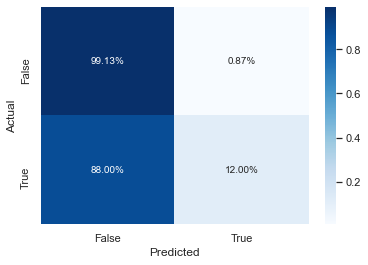

In [13]:
# calculate and plot Confusion Matrix
cm = confusion_matrix(hd_train_y, y_pred)

cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

ax = sns.heatmap(cm_norm, annot=True, 
            fmt='.2%', cmap='Blues')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [14]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
TN = confusion_matrix(hd_train_y, y_pred)[0,0]
FP = confusion_matrix(hd_train_y, y_pred)[0,1]
FN = confusion_matrix(hd_train_y, y_pred)[1,0]
TP = confusion_matrix(hd_train_y, y_pred)[1,1]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", np.round(TPR,4))

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", np.round(PPV,4))

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", np.round(FPR,4))

# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", np.round(FNR,4))

##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)

## print the precision and recall here
print("The training recall is",
         np.round(recall_score(hd_train_y, y_pred),4))

print("The training precision is",
         np.round(precision_score(hd_train_y, y_pred),4))

The True Positive Rate is: 0.12
The Precision is: 0.5629
The False positive rate is: 0.0087
The False Negative Rate is:  0.88

The average TPR is: 0.05998901802873616
The average Precision is: 0.2814512666380421
The average False positive rate is: 0.00435076202442923
The average False Negative Rate is: 0.4400109819712638
The training recall is 0.12
The training precision is 0.5629
